In [112]:
import warnings

# Importamos las librerias necesarias para nuestro proyecto
import pandas as p
import matplotlib.pyplot as plot
import pandas as pd
import seaborn as sb
import numpy as np
from scipy.stats import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')

In [113]:
# Importamos nuestros datos desde el csv
stroke_original = p.read_csv("stroke.csv", na_values=[np.nan])

stroke_original.drop("id", axis="columns", inplace=True)
stroke_original.gender = [1 if each == "Male" else 0 for each in stroke_original.gender]
stroke_original.ever_married = [1 if each == "Yes" else 0 for each in stroke_original.ever_married]
stroke_original.work_type = [1 if each == "Private" else 0 for each in stroke_original.work_type]
stroke_original.Residence_type = [1 if each == "Urban" else 0 for each in stroke_original.Residence_type]
stroke_original.smoking_status = [1 if each == "formerly smoked" else 0 for each in stroke_original.smoking_status]
# Quitamos la columna "Outcome" ya que no nos servirá para nuestro estudio estadístico
# stroke = stroke_original.drop("stroke", axis="columns")


stroke = stroke_original.dropna(axis="rows")
# stroke
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
2,1,80.0,0,1,1,1,0,105.92,32.5,0,1
3,0,49.0,0,0,1,1,1,171.23,34.4,0,1
4,0,79.0,1,0,1,0,0,174.12,24.0,0,1
5,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
653,0,60.0,0,0,0,1,1,105.48,28.4,0,0
654,0,19.0,0,0,0,1,1,100.60,20.5,0,0
655,1,15.0,0,0,0,1,1,65.05,24.6,0,0
656,1,20.0,0,0,0,1,0,75.90,32.2,0,0


In [114]:
# Calculamos la Media, Mediana, Moda, Rango, Desviacion Tipica, Varianza de cada variable y la metemos en un diccionario que mas tarde representaremos en una tabla
datos_dict = dict()
for x in stroke.columns:
    stroke[x] = stroke[x].astype(str)
    stroke[x] = p.to_numeric(stroke[x])
    datos_dict.update({
        x: [stroke[x].mean(), stroke[x].median(),
                    stroke[x].mode()[0],
                    stroke[x].max() - stroke[x].min(), stroke[x].std(),
                    stroke[x].var()]
    })

columnas = ["Media", "Mediana", "Moda", "Rango", "Desviacion Tipica", "Varianza"]
media_moda_etc = p.DataFrame.from_dict(datos_dict, orient="index", columns=columnas)
media_moda_etc

,Media,Mediana,Moda,Rango,Desviacion Tipica,Varianza
gender,0.399023,0.000,0.00,1.00,0.490097,0.240195
age,47.248339,50.000,78.00,81.68,23.516010,553.002721
hypertension,0.131922,0.000,0.00,1.00,0.338682,0.114705
heart_disease,0.063518,0.000,0.00,1.00,0.244091,0.059580
ever_married,0.679153,1.000,1.00,1.00,0.467183,0.218260
work_type,0.581433,1.000,1.00,1.00,0.493726,0.243766
Residence_type,0.530945,1.000,1.00,1.00,0.499448,0.249449
avg_glucose_level,109.247801,92.645,67.92,212.48,49.571536,2457.337153
bmi,29.296091,28.800,26.10,47.60,7.373219,54.364357
smoking_status,0.195440,0.000,0.00,1.00,0.396862,0.157500


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'gender'),
  Text(1, 0, 'age'),
  Text(2, 0, 'hypertension'),
  Text(3, 0, 'heart_disease'),
  Text(4, 0, 'ever_married'),
  Text(5, 0, 'work_type'),
  Text(6, 0, 'Residence_type'),
  Text(7, 0, 'avg_glucose_level'),
  Text(8, 0, 'bmi'),
  Text(9, 0, 'smoking_status'),
  Text(10, 0, 'stroke')])

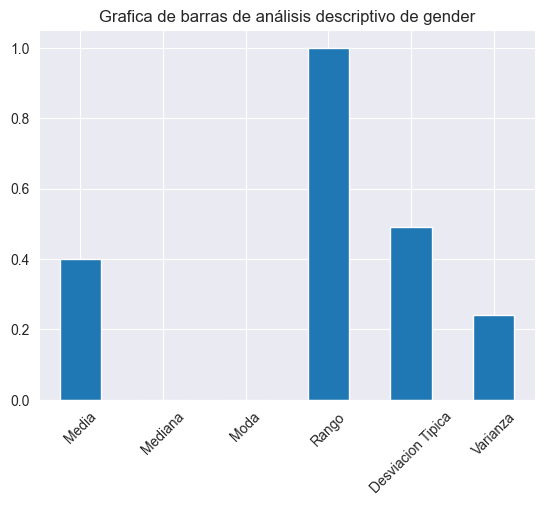

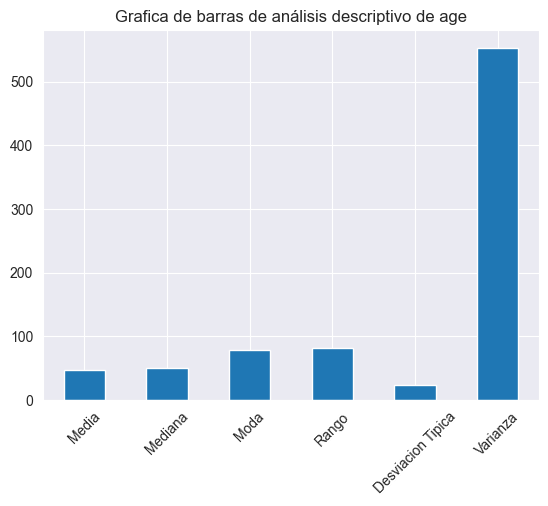

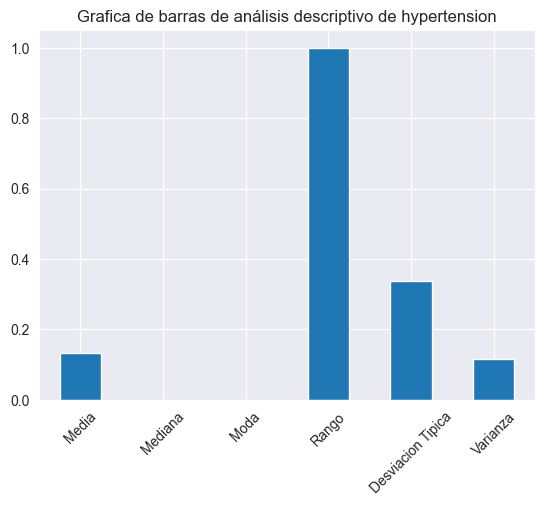

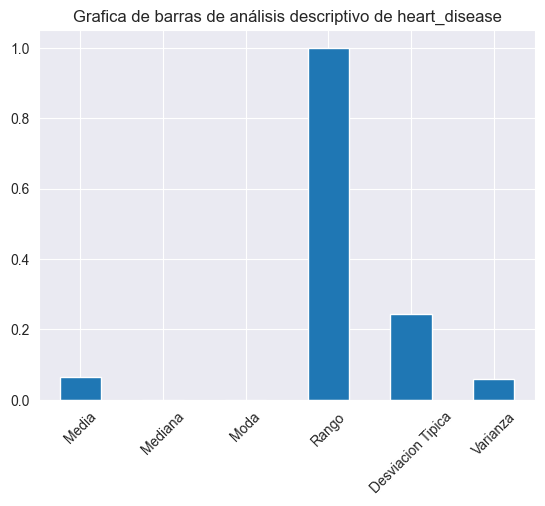

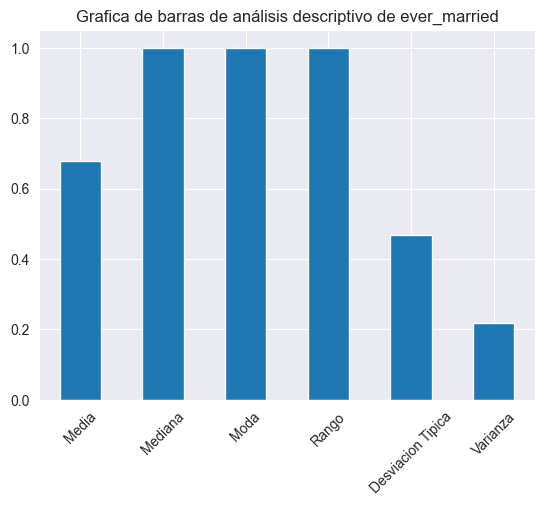

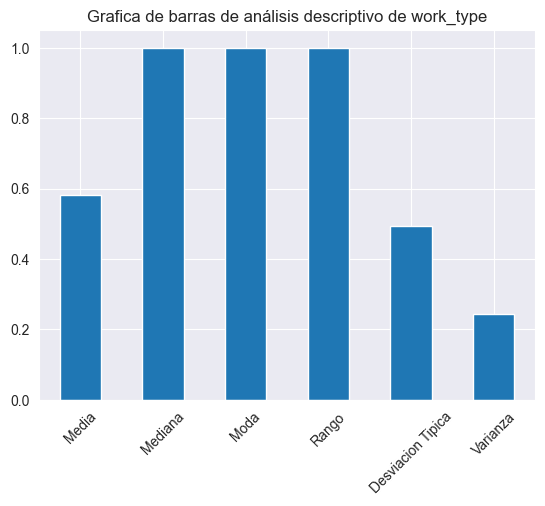

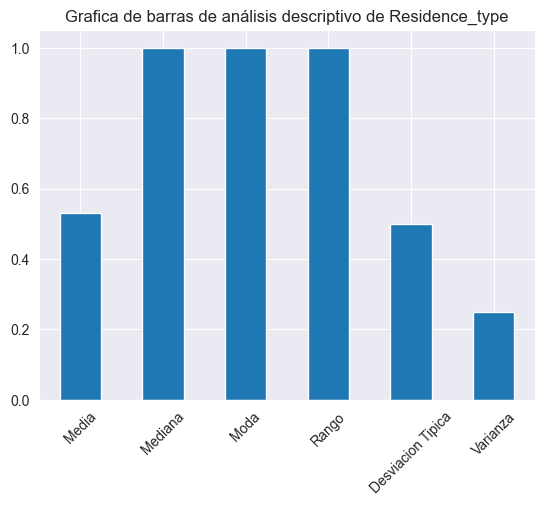

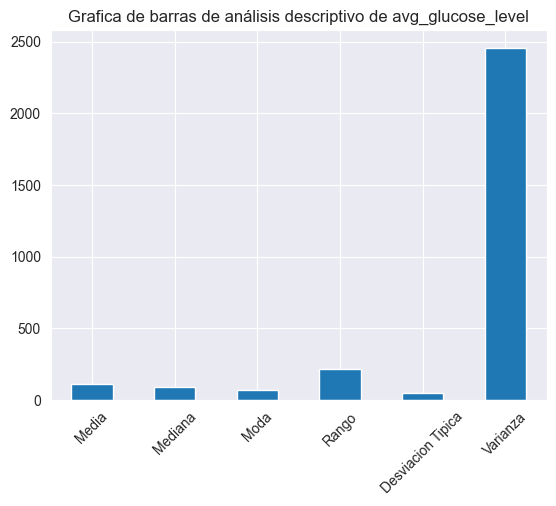

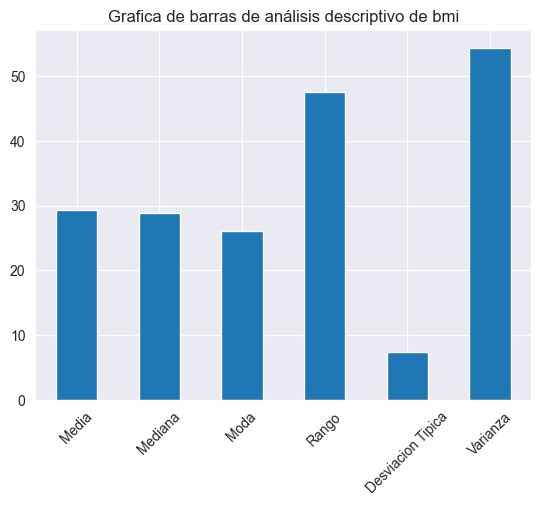

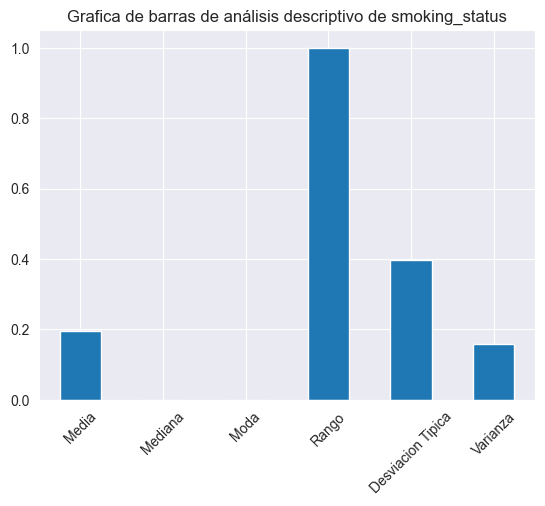

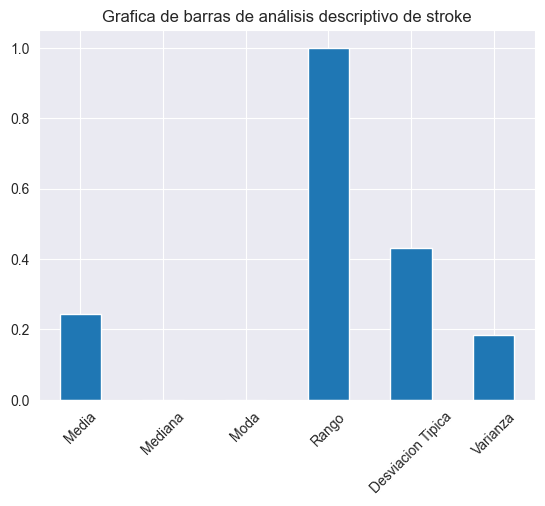

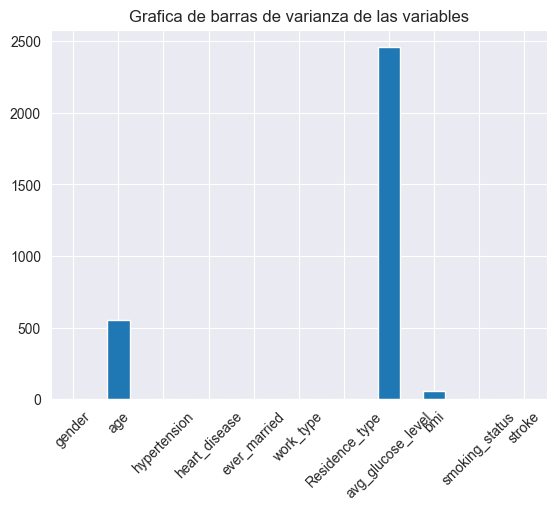

In [115]:
# Graficas de barras de la Media, Mediana, Moda, Rango, Desviacion Tipica de cada variable
varianza = media_moda_etc["Varianza"]
# media_moda_etc2.loc[media_moda_etc2.index.drop(["Insulin", "Glucose", "BloodPressure"])].plot.bar(rot=0)
# plot.xticks(rotation=45)
# media_moda_etc2.loc[["Insulin", "Glucose", "BloodPressure"]].plot.bar(rot=0)
# media_moda_etc.drop(["Varianza"], axis="columns").plot.bar(rot=0)


for x in media_moda_etc.index:
     plot.figure()
     plot.title("Grafica de barras de análisis descriptivo de " + x)
     media_moda_etc.loc[x].plot.bar(rot=0)
     plot.xticks(rotation=45)


# Varianza de cada variable
plot.figure()

plot.title("Grafica de barras de varianza de las variables")
varianza.plot.bar(rot=0)
plot.xticks(rotation=45)
# Etiquetas rotadas para mejor lectura


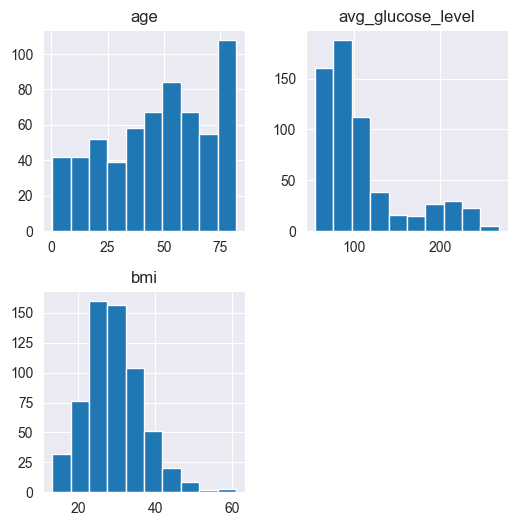

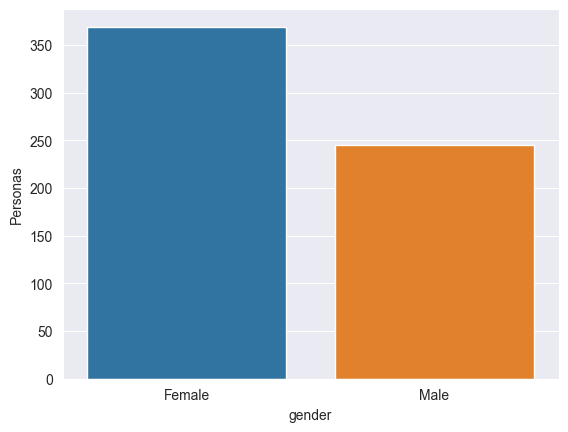

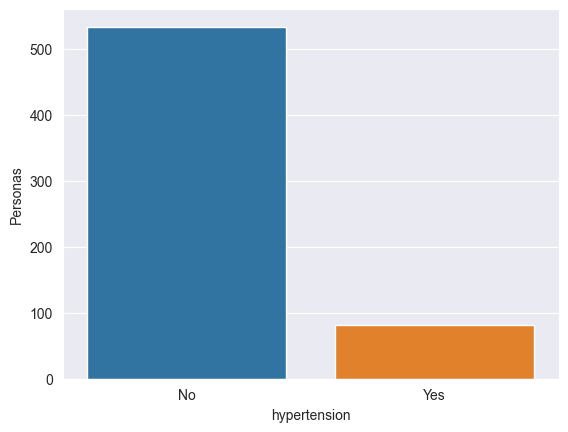

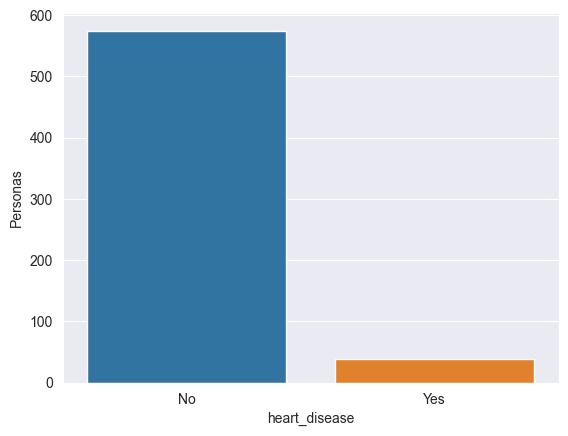

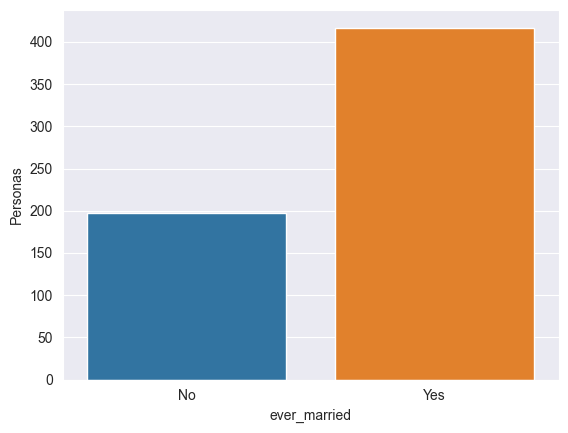

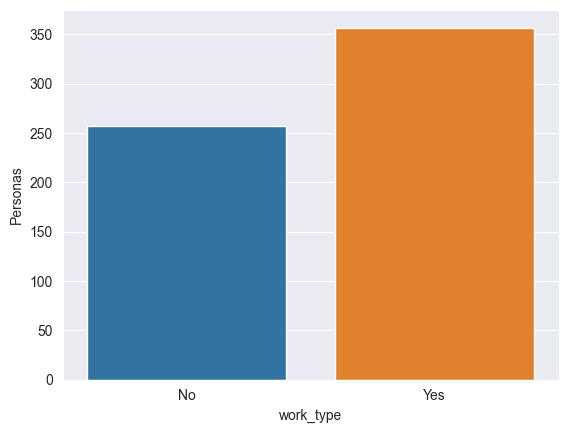

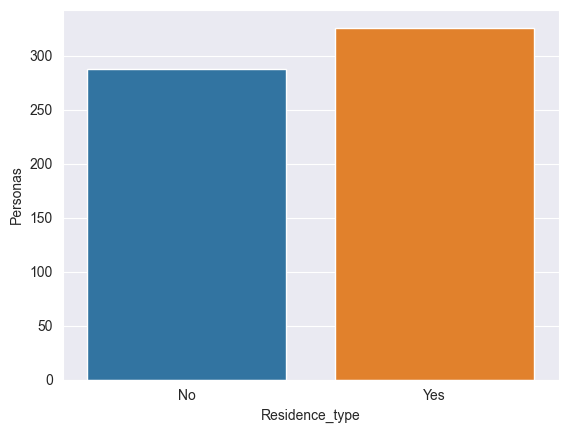

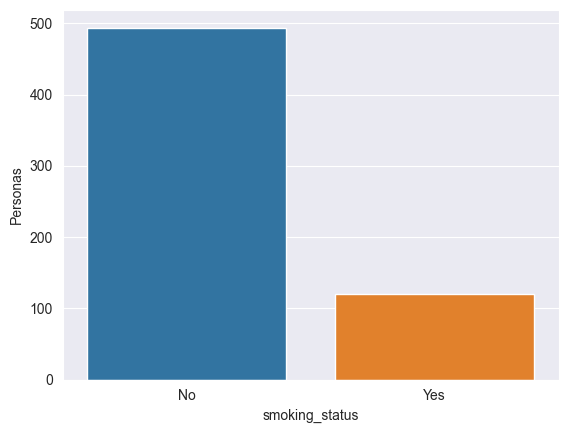

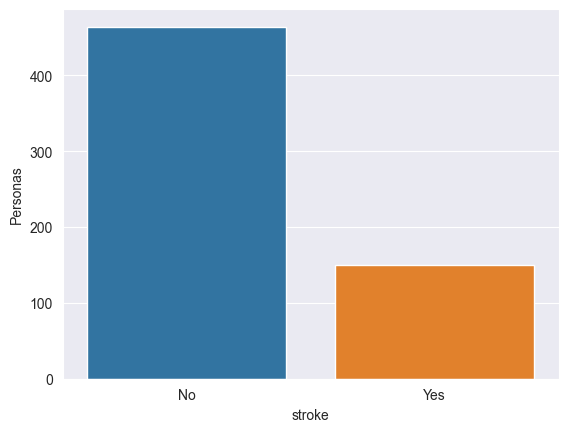

In [116]:
# Histogramas de cada variable
# stroke[["hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status", "stroke"]].hist(figsize = (20,20))

stroke[stroke.columns.drop(["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status", "stroke"])].hist(figsize = (6, 6))


plot.figure()
count_an = sb.countplot(x="gender", data=stroke)
count_an.set_xticklabels(labels=["Female", "Male"])
count_an.set(xlabel="gender", ylabel="Personas")

for x in stroke.columns.drop(["age", "avg_glucose_level", "gender", "bmi"]):
    plot.figure()
    count_an = sb.countplot(x=x, data=stroke)
    count_an.set_xticklabels(labels=["No", "Yes"])
    count_an.set(xlabel=x, ylabel="Personas")

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'work_type'),
  Text(2, 0, 'ever_married'),
  Text(3, 0, 'Residence_type'),
  Text(4, 0, 'gender'),
  Text(5, 0, 'heart_disease'),
  Text(6, 0, 'hypertension')])

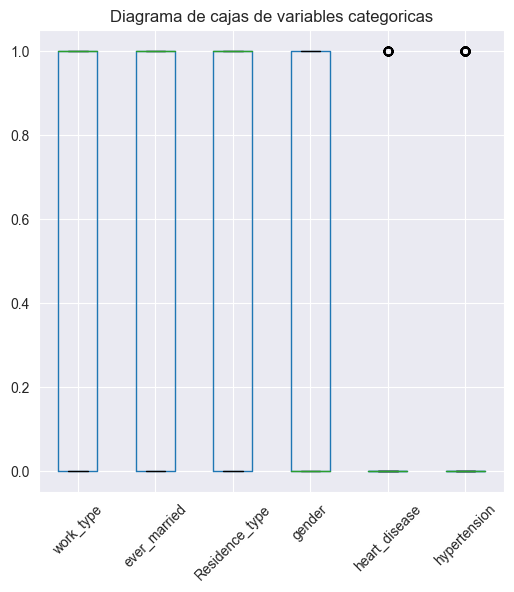

In [117]:
# Diagrama de cajas de cada variable
stroke[["work_type", "ever_married", "Residence_type", "gender", "heart_disease", "hypertension"]].boxplot(figsize=(6, 6))
plot.title("Diagrama de cajas de variables categoricas")
plot.xticks(rotation=45)

# plot.figure()
# sb.boxplot(stroke[stroke.columns[5:]])
# plot.title("Diagrama de cajas (2/2)")
# plot.xticks(rotation=45)

Text(0.5, 1.0, 'Matriz de coeficiente de correlación entre variables')

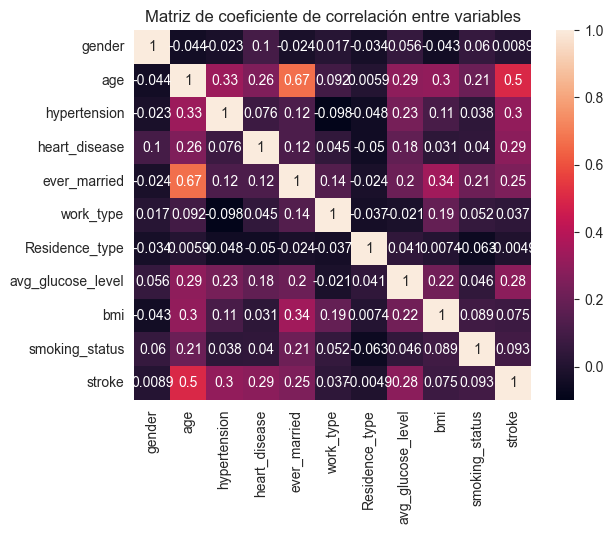

In [118]:
# Creamos una matriz de correlacion para poder ver cuales son las variables más relacionadas de forma clara por medio de su coeficiente de correlacion
sb.heatmap(stroke.corr(), annot=True)
plot.title("Matriz de coeficiente de correlación entre variables")

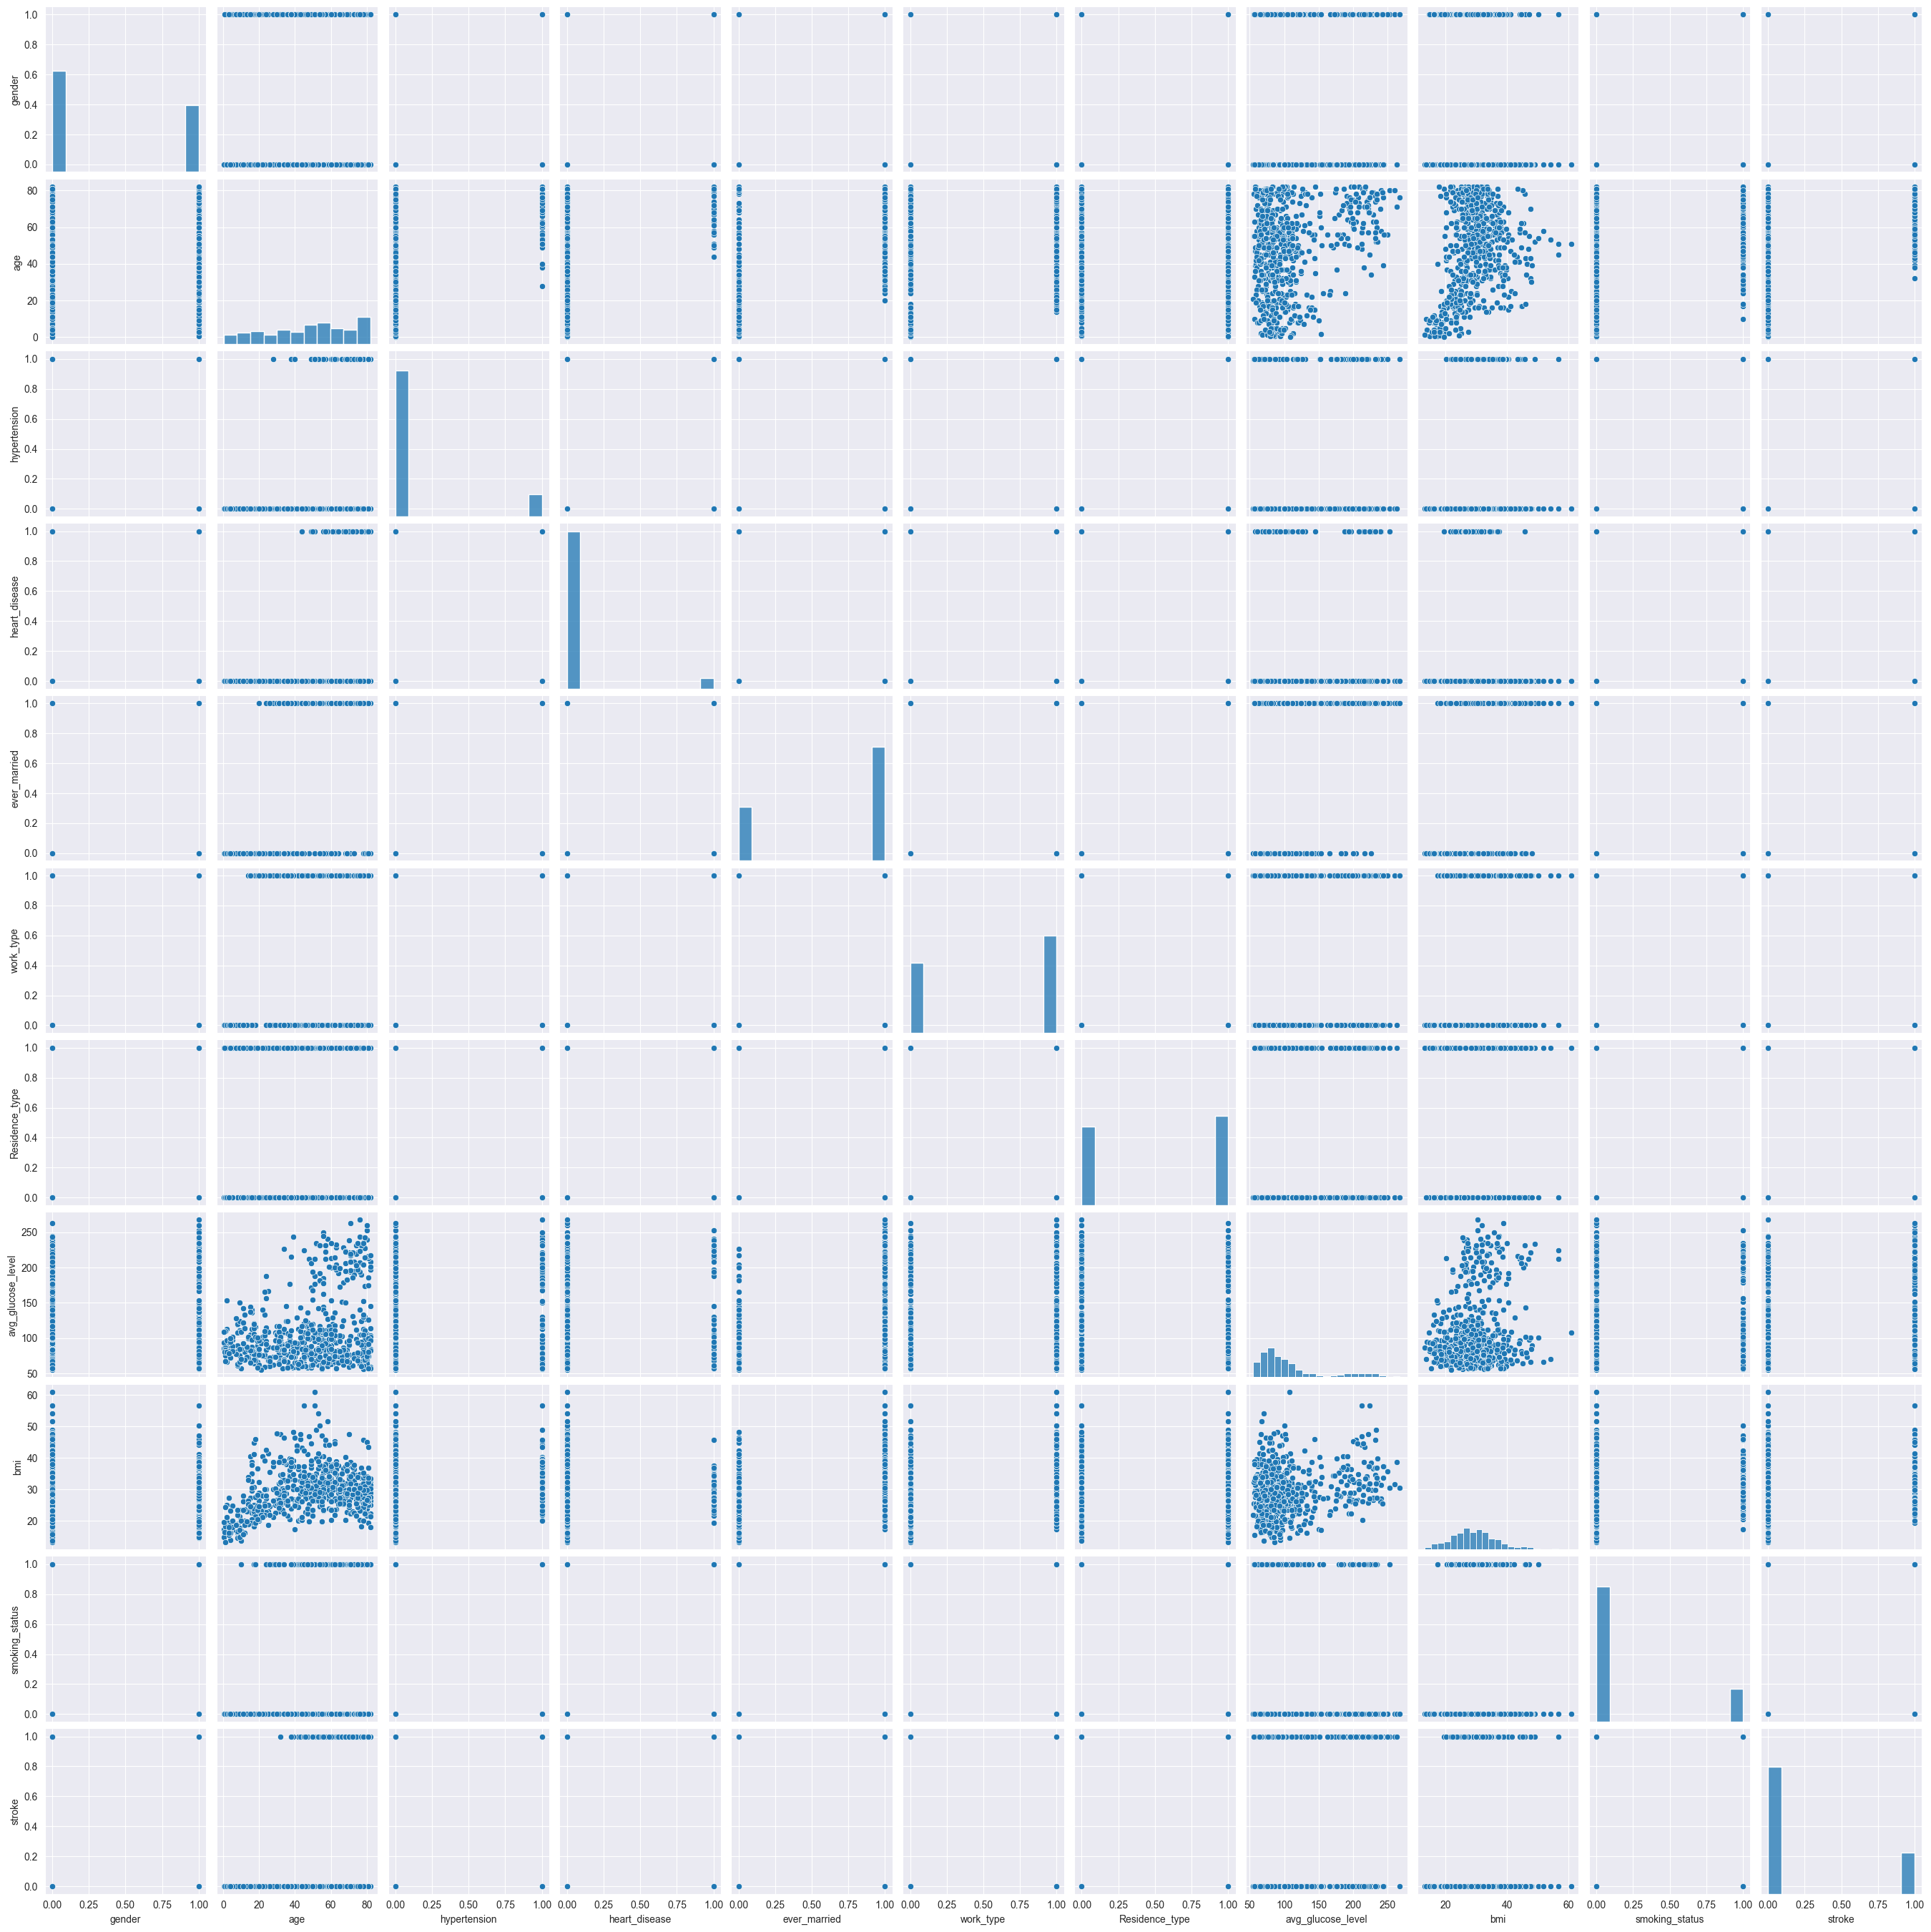

In [119]:
# Diagrama de correlacion por pares, para entender la anterior matriz de correlacion
sb.pairplot(stroke)



<Figure size 640x480 with 0 Axes>

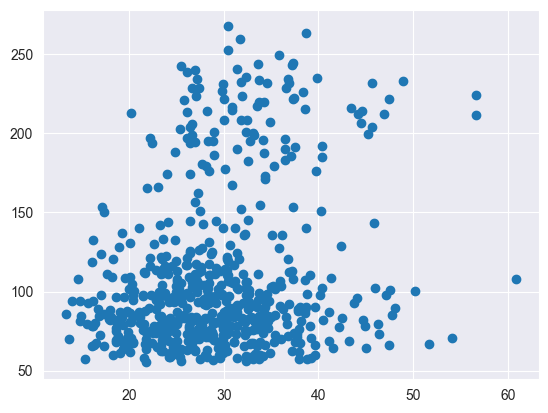

<Figure size 640x480 with 0 Axes>

In [120]:
# Encontramos que age y ever_married tienen una alta correlacion, imprimimos su correlacion en grafica
# sb.scatterplot(stroke, x="age", y="avg_glucose_level")

plot.scatter(x=stroke["bmi"], y=stroke["avg_glucose_level"])
plot.figure()

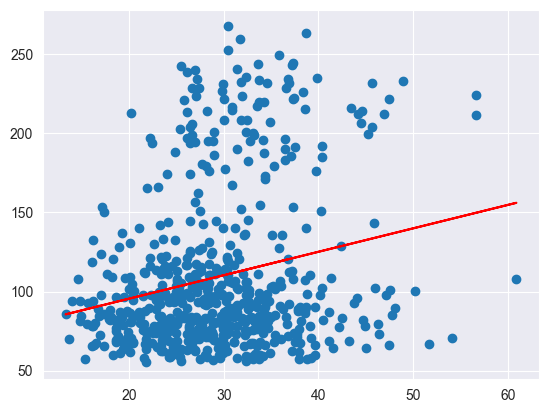

In [121]:
slope, intercept, r, p, std_err = stats.linregress(stroke["bmi"], stroke["avg_glucose_level"])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, stroke["bmi"]))
plot.scatter(stroke["bmi"], stroke["avg_glucose_level"])
plot.plot(stroke["bmi"], mymodel, "r")
plot.show()


In [122]:
# TODO:
# ✓Un análisis de regresión para las dos variables continuas, así como su gráfico de dispersión y el
# coeficiente de correlación.
# ✓Gráficos y tablas que pueden explicar las variables de una manera más completa (diagramas de
# caja según variable categórica, por ejemplo).